In [2]:
from src.database.firebase_manager import get_firebase_data, connect_to_firebase
import pandas as pd
import numpy as np
import folium
import re
connect_to_firebase()

In [3]:
data = get_firebase_data("Perdizes, São Paulo, São Paulo")

df = pd.DataFrame(data)
df

,banheiros,distance,endereço,lat,link,lon,preço,quartos,site,texto,área,vagas,valor_de_condominio
0,1,32.728778,"Perdizes, São Paulo, Estado de São Paulo",-23.537929,https://rd.clk.thribee.com/id.4s1Vy1fk1j1g/ori...,-46.680671,3800,4,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",180,NaN,NaN
1,1,32.728778,"Perdizes, São Paulo, Estado de São Paulo",-23.537929,https://rd.clk.thribee.com/id.S1J1f1DeD1Di/ori...,-46.680671,2000,2,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",80,NaN,NaN
2,2,32.728778,"Perdizes, São Paulo, Estado de São Paulo",-23.537929,https://rd.clk.thribee.com/id.6B1_9ft191F/orig...,-46.680671,2300,1,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",74,NaN,NaN
3,1,32.728778,"Perdizes, São Paulo, Estado de São Paulo",-23.537929,https://rd.clk.thribee.com/id.nF1F4w17131s/ori...,-46.680671,1900,2,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",97,NaN,NaN
4,1,32.728778,"Perdizes, São Paulo, Estado de São Paulo",-23.537929,https://rd.clk.thribee.com/id.H1UVU1dO31r/orig...,-46.680671,5500,3,trovit,"Apartamento, Perdizes, São Paulo\nPerdizes, Sã...",170,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,3,32.728300,"Rua Bartira, 1316 - Perdizes, São Paulo - SP",-23.535025,https://www.vivareal.com.br/imovel/2532424604,-46.677090,3500,3,vivareal,"Apartamento com 3 Quartos para Aluguel, 91m²\n...",91,1.0,950.0
85,1,32.739079,"Rua Turiassu - Perdizes, São Paulo - SP",-23.525218,https://www.vivareal.com.br/imovel/2533364328,-46.682525,2500,1,vivareal,"Apartamento com Quarto para Aluguel, 71m²\nRua...",71,0.0,800.0
86,5,32.728778,"Perdizes, São Paulo - SP",-23.537929,https://www.vivareal.com.br/imovel/2532927744,-46.680671,40000,5,vivareal,Apartamento com 5 Quartos para Venda/Aluguel 4...,450,6.0,4250.0
87,3,32.723061,"Rua Ministro Godói - Perdizes, São Paulo - SP",-23.535204,https://www.vivareal.com.br/imovel/2533270012,-46.669858,5150,3,vivareal,"Apartamento com 3 Quartos para Aluguel, 100m²\...",100,1.0,1358.0


In [4]:
# Analisando onde não conseguimos extrair a latitude
# df.loc[df.lat.isnull()]

In [5]:
# Removendo anúncios que não tem coordenadas
df = df.loc[df.lat.notna()]
# Removendo alguns NaNs secundários
df.vagas.fillna("Não especificado", inplace=True)
df.quartos.fillna("Não especificado", inplace=True)
df["área"].fillna("Não especificado", inplace=True)

In [6]:
first_sixth = np.quantile(df.preço, 1/6)
last_sixth = np.quantile(df.preço, 5/6)

# Criando nosso mapa
m = folium.Map(location=[-23.537034, -46.674346], zoom_start=13)

for lat,lon,preco,n_quartos,n_banheiros,n_vagas,area,link  in zip(df.lat, df.lon, df['preço'], df['quartos'], df['banheiros'], df['vagas'], df['área'], df.link):
    html = f'''
    <table id="vertical-1">
      <caption>endereço</caption>
      <tr>
        <th>Aluguel</th>
        <td>R$ {preco},00</td>
      </tr>
      <tr>
        <th>Quartos</th>
        <td>{n_quartos}</td>
      </tr>
      <tr>
        <th>Banheiros</th>
        <td>{n_banheiros}</td>
      </tr>
      <tr>
        <th>Vagas</th>
        <td>{n_vagas}</td>
      </tr>
      <tr>
        <th>Área</th>
        <td>{area} m²</td>
      </tr>
      <tr>
        <th>link</th>
        <td><a href={link}>link</a></td>
      </tr>
    </table>'''
    iframe = folium.IFrame(html,
                       width=225,
                       height=200)
    popup = folium.Popup(iframe)
    if preco <= first_sixth:
        color="green"
    elif preco < last_sixth:
        color="orange"
    else:
        color="red"
    folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=folium.Icon(icon="building", prefix="fa", color=color),
    ).add_to(m)

In [7]:
m

<AxesSubplot:xlabel='preço', ylabel='Count'>

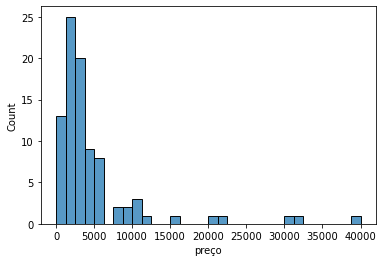

In [8]:
import seaborn as sns
sns.histplot(df.preço)

<AxesSubplot:xlabel='preço', ylabel='Count'>

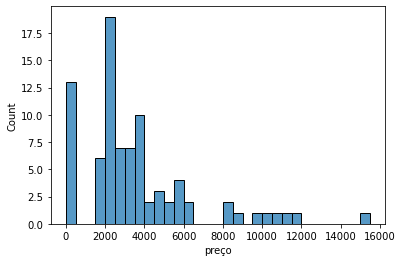

In [9]:
import seaborn as sns
sns.histplot(df[df.preço < np.quantile(df.preço, 0.95)].preço, binwidth=500)